In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/My Drive/Research/FU_AI_LAB/Ear_recognize/"

/content/drive/My Drive/Research/FU_AI_LAB/Ear_recognize


In [3]:
import pandas as pd
import numpy as np
import os
import cv2
import random

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
!pip uninstall tensorflow
!pip install tensorflow
!pip install --upgrade tensorflow
%tensorflow_version 2.9.x
import tensorflow as tf
tf.__version__

Found existing installation: tensorflow 2.9.1
Uninstalling tensorflow-2.9.1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.9.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.9.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.9.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511.7 MB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.9.x`. This will be interpreted as: `2.x`.


TensorFlow 2.x 

'2.9.1'

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [6]:
import tensorflow as tf
tf.__version__

'2.9.1'

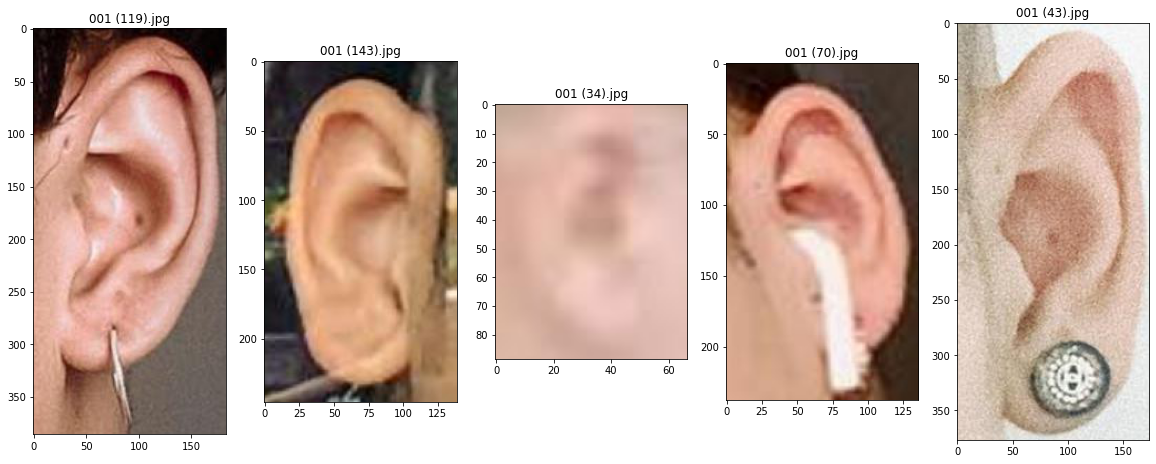

In [7]:
plt.figure(figsize=(20,20))
test_folder="./Dataset/EarVN1.0dataset/split_dataset/train/001.ALI_HD/"
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [8]:
IMG_HEIGHT = 257
IMG_WIDTH = 161
BATCH_SIZE = 32
TRAININGSET_PATH = "./Dataset/EarVN1.0dataset/split_dataset/train/"
VALIDATION_PATH  = "./Dataset/EarVN1.0dataset/split_dataset/val"
TEST_PATH = "./Dataset/EarVN1.0dataset/split_dataset/test"

In [9]:
# train_ds = tf.data.Dataset.list_files(TRAININGSET_PATH + "*/*", shuffle=200)
# val_ds = tf.data.Dataset.list_files(VALIDATION_PATH + "*/*", shuffle=200)
# test_ds = tf.data.Dataset.list_files(TEST_PATH + "*/*", shuffle=200)

In [10]:
# train_ds = tf.keras.utils.image_dataset_from_directory(
#   TRAININGSET_PATH,
#   seed=123,
#   image_size=(IMG_HEIGHT, IMG_WIDTH),
#   batch_size=BATCH_SIZE
# )

In [11]:
# val_ds = tf.keras.utils.image_dataset_from_directory(
#   VALIDATION_PATH,
#   seed=123,
#   image_size=(IMG_HEIGHT, IMG_WIDTH),
#   batch_size=BATCH_SIZE
# )

In [12]:
# test_ds = tf.keras.utils.image_dataset_from_directory(
#   TEST_PATH,
#   seed=123,
#   image_size=(IMG_HEIGHT, IMG_WIDTH),
#   batch_size=BATCH_SIZE
# )

In [13]:
# class_names = train_ds.class_names
# print(class_names)

In [14]:
TRAIN_PATH = "./Dataset/EarVN1.0dataset/Images/"
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAININGSET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size =(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    VALIDATION_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size =(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 22737 files belonging to 164 classes.
Using 18190 files for training.
Found 2842 files belonging to 164 classes.
Using 568 files for validation.


In [15]:
# for image_batch, labels_batch in training_dataset:
#   print(image_batch.shape)
#   print(labels_batch.shape)
#   _ = plt.imshow(np.array(image_batch[0],np.int32))
#   _ = plt.show()
#   break

In [16]:
# import tensorflow as tf
# del data_augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.04166, fill_mode="nearest"),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1),
    layers.GaussianNoise(
        tf.random.uniform(shape=[],minval=0.3, maxval=0.6, dtype=tf.float32, seed=10).numpy()
    ),
])


In [17]:
!pip install git+https://github.com/qubvel/classification_models.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-49ell2nu
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-49ell2nu
  Running command git submodule update --init --recursive -q


In [18]:
from classification_models.keras import Classifiers

In [19]:
ResNet18, preprocess_input = Classifiers.get('resnext101')
# build model
base_model = ResNet18(input_shape=(257, 161, 3), weights='imagenet', include_top=False)
# x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
# output = tf.keras.layers.Dense(len(train_ds.class_names), activation='softmax')(x)
# model = tf.keras.models.Model(inputs=[base_model.input], outputs=[output])

In [20]:
pre_train_ds = training_dataset.map(
  lambda x, y: (preprocess_input(x), y))
# aug_ds = pre_train_ds.map(
#   lambda x, y: (data_augmentation(x , training=True), y))

In [21]:
pre_train_ds

<MapDataset element_spec=(TensorSpec(shape=(None, 257, 161, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
model = tf.keras.Sequential([
    # data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(164, activation="softmax")
])
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# epochs=5
history = model.fit(
    pre_train_ds,
    validation_data=val_dataset,
    epochs=100
)
model.save('Model_resnext101_e100.h5')

Epoch 1/100
569/569 [==============================] - 36796s 65s/step - loss: 4.6015 - accuracy: 0.0765 - val_loss: 3.7505 - val_accuracy: 0.1725
Epoch 2/100
513/569 [==========================>...] - ETA: 1:00:40 - loss: 2.7920 - accuracy: 0.3661

In [ ]:
model.save('Model_resnext101_e100.h5')

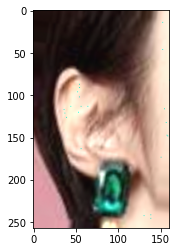

In [ ]:
image_batch, labels_batch = next(iter(aug_ds))
_ = plt.imshow(np.uint8(image_batch[0]))
_ = plt.show()

In [ ]:
max(image_batch[0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.033357035>